In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
prep_data = data.copy()

In [7]:
# Convert 'InvoiceDate' to datetime
prep_data['InvoiceDate'] = pd.to_datetime(prep_data['InvoiceDate'])

# Create 'Revenue' feature
prep_data['Revenue'] = prep_data['Quantity'] * prep_data['UnitPrice']

In [8]:
prep_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


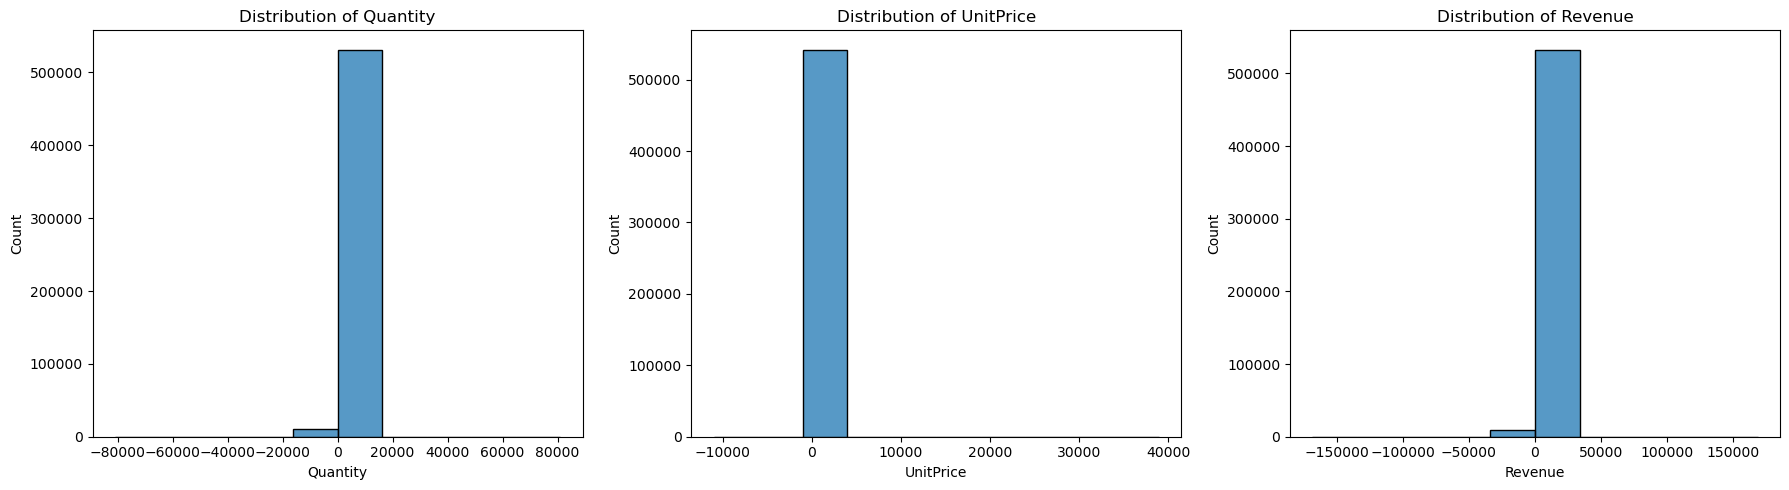

In [9]:
# Now let's look at the distributions of 'Quantity', 'UnitPrice', and 'Revenue'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plotting the distribution of Quantity
sns.histplot(prep_data['Quantity'], bins=10, ax=axes[0], kde=False)
axes[0].set_title('Distribution of Quantity')

# Plotting the distribution of UnitPrice
sns.histplot(prep_data['UnitPrice'], bins=10, ax=axes[1], kde=False)
axes[1].set_title('Distribution of UnitPrice')

# Plotting the distribution of Revenue
sns.histplot(prep_data['Revenue'], bins=10, ax=axes[2], kde=False)
axes[2].set_title('Distribution of Revenue')

plt.tight_layout()
plt.show()

In [10]:
filtered_data = prep_data[(prep_data['Quantity'] > 0) & (prep_data['UnitPrice'] > 0)]
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
 8   Revenue      530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.4+ MB


In [12]:
filtered_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
Revenue             0
dtype: int64

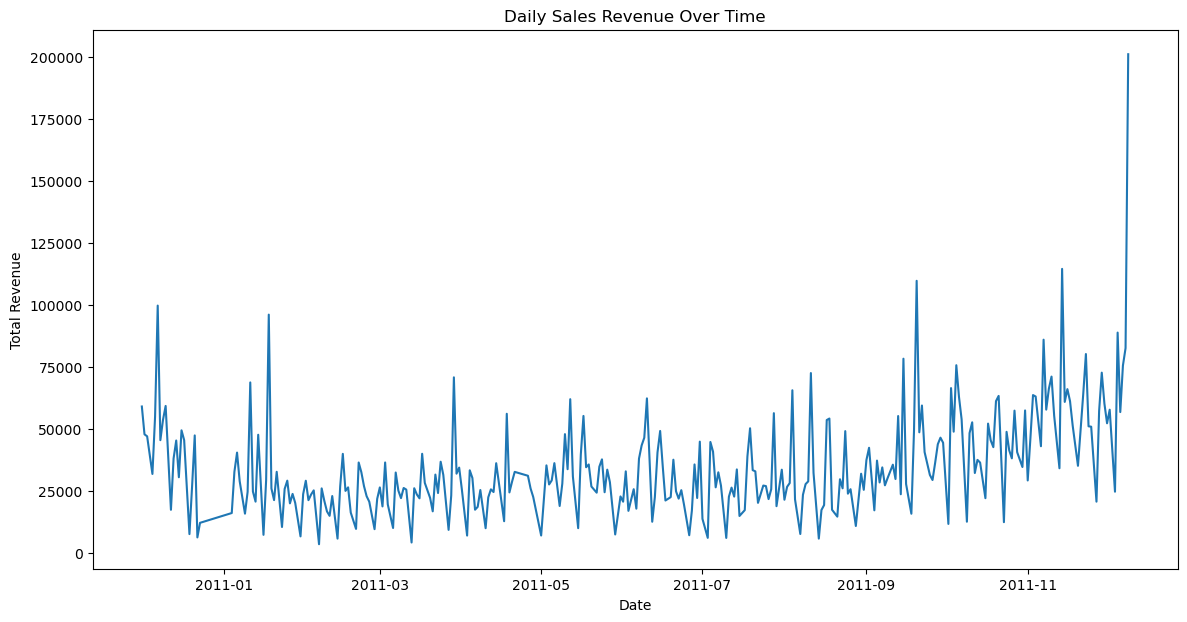

In [13]:
# Aggregate the sales revenue data by date
daily_revenue = filtered_data.groupby(filtered_data['InvoiceDate'].dt.date)['Revenue'].sum()
daily_revenue.to_csv("actual.csv")

# Plot the daily sales revenue over time
plt.figure(figsize=(14, 7))
daily_revenue.plot(title='Daily Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

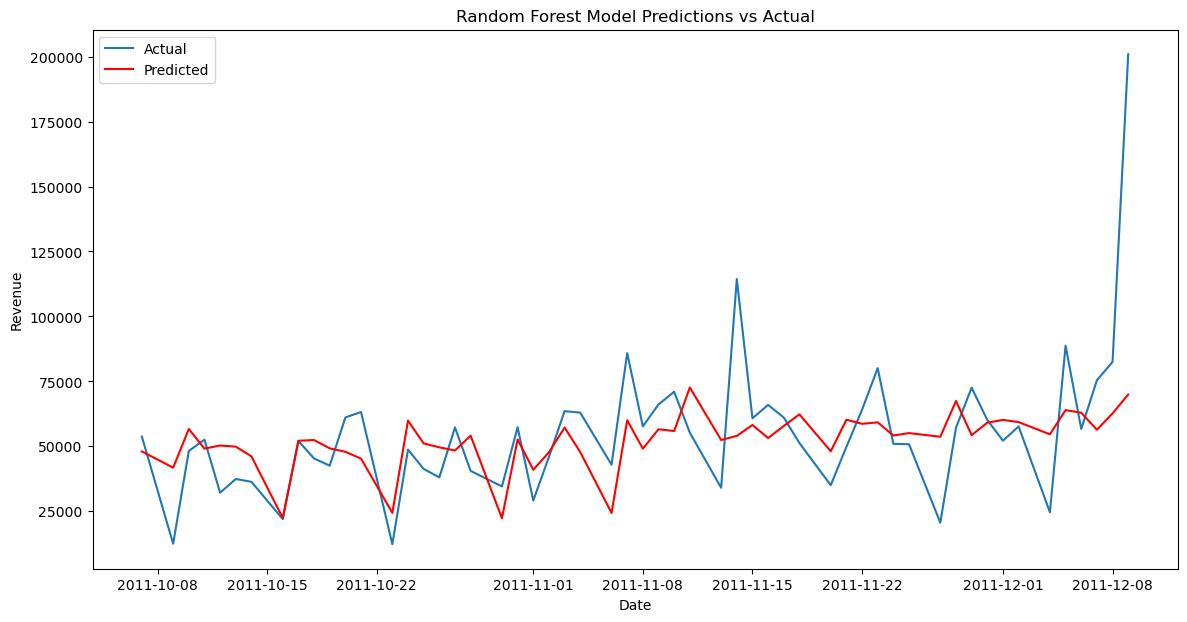

(23864.823540855825, 14831.330922545454, 0.24044019803204886)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Number of lags (days back) to use for models
n_lags = 30

# Create a DataFrame to hold our lagged variables
lagged_data = pd.DataFrame(index=daily_revenue.index)

# Create the lagged variables
for i in range(n_lags, 0, -1):
    lagged_data[f'lag_{i}'] = daily_revenue.shift(i)

# Drop the NaN values after shifting
lagged_data = lagged_data.dropna()

# The target variable is the original daily_revenue, aligned with the lagged_data
target_data = daily_revenue[n_lags:]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(lagged_data, target_data, test_size=0.2, shuffle=False)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE for the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Random Forest Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

rmse, mae, r2

# Filter Extreme Values

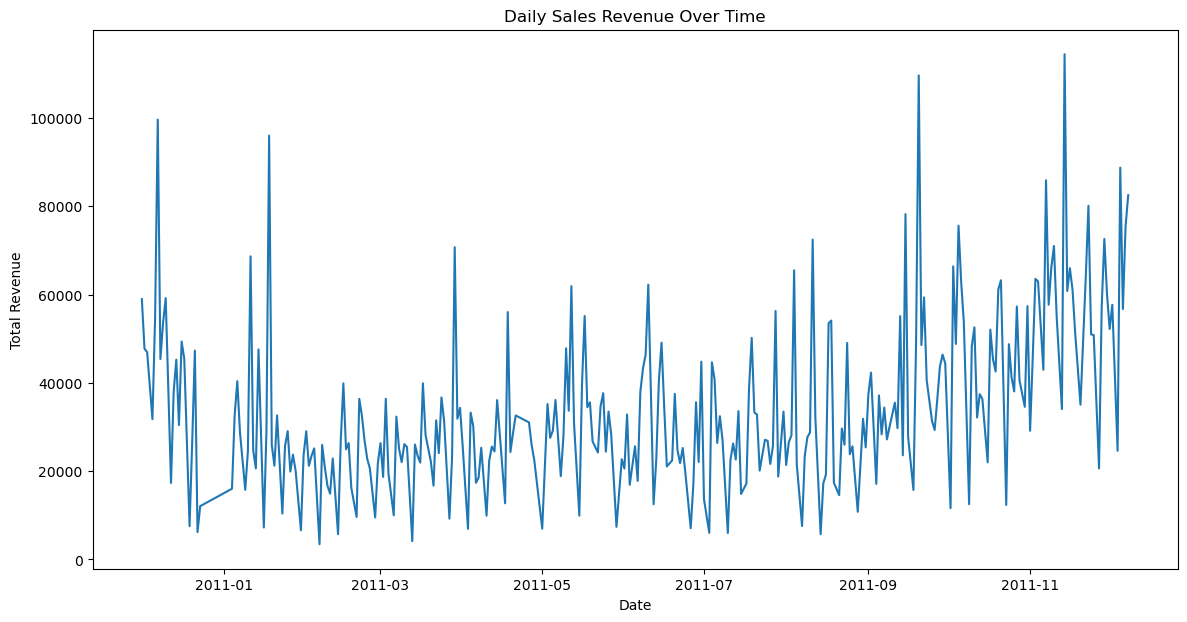

In [15]:
# Aggregate the sales revenue data by date
daily_revenue = filtered_data.groupby(filtered_data['InvoiceDate'].dt.date)['Revenue'].sum()
daily_revenue_filter = daily_revenue[:-1]

# Plot the daily sales revenue over time
plt.figure(figsize=(14, 7))
daily_revenue_filter.plot(title='Daily Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

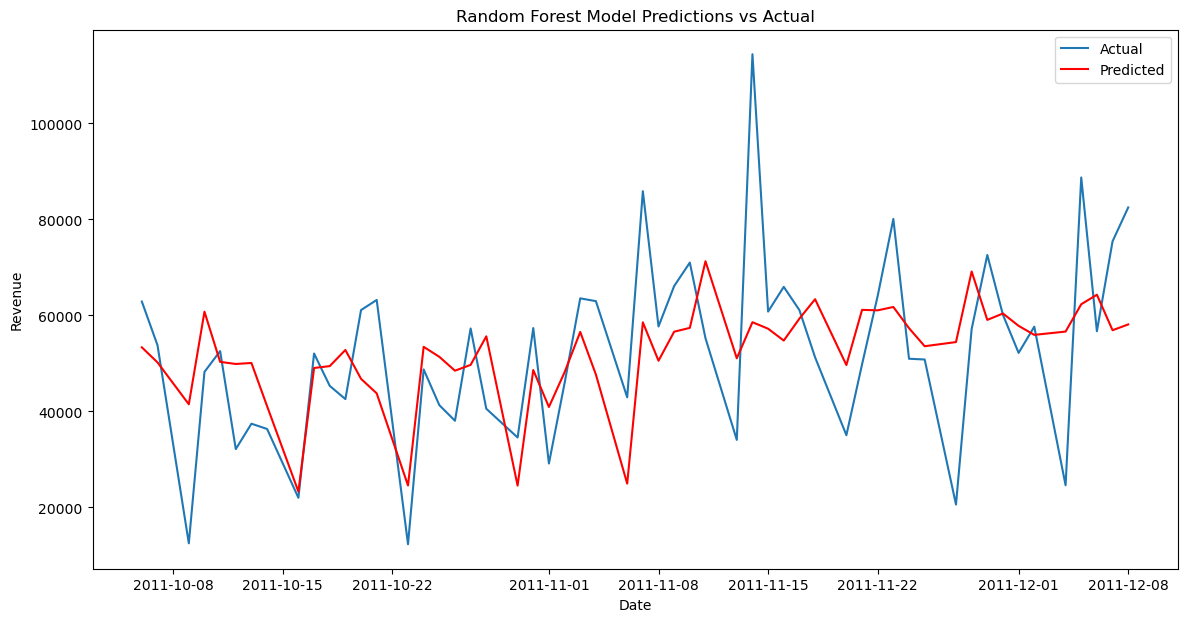

(15894.937267159828, 12455.201558545452, 0.29563449927061125)

In [16]:
# Create a DataFrame to hold our lagged variables
lagged_filter_data = pd.DataFrame(index=daily_revenue_filter.index)

# Create the lagged variables
for i in range(n_lags, 0, -1):
    lagged_filter_data[f'lag_{i}'] = daily_revenue_filter.shift(i)

# Drop the NaN values after shifting
lagged_filter_data = lagged_filter_data.dropna()

# The target variable is the original daily_revenue, aligned with the lagged_data
target_filter_data = daily_revenue_filter[n_lags:]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(lagged_filter_data, target_filter_data, test_size=0.2, shuffle=False)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE for the predictions
rmse_filter = mean_squared_error(y_test, y_pred, squared=False)
mae_filter = mean_absolute_error(y_test, y_pred)
r2_filter = r2_score(y_test, y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Random Forest Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

rmse_filter, mae_filter, r2_filter

## Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# Define a time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Create a parameter grid to search for best parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=tscv,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,  # Use all available cores
                           verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding best score (RMSE)
best_params = grid_search.best_params_
best_score = (-grid_search.best_score_)**0.5  # Take square root of the negative MSE to get RMSE

best_params, best_score

Fitting 5 folds for each of 36 candidates, totalling 180 fits


({'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 200},
 14370.386496662086)

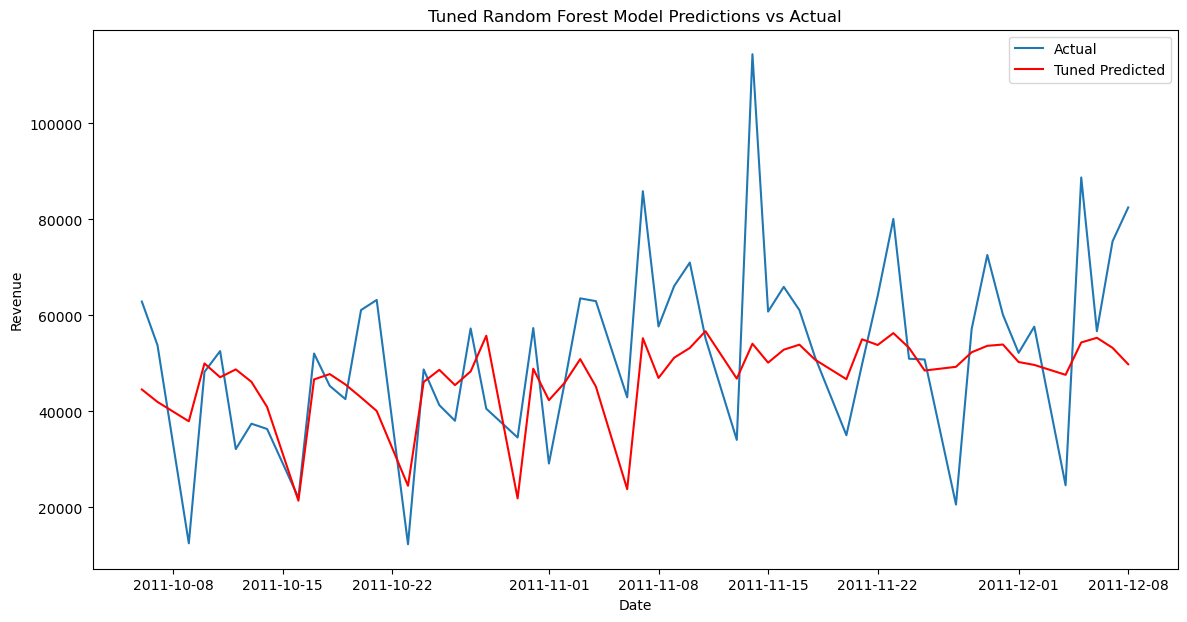

(16744.037354510197, 12742.18973331409, 0.2183707404968328)

In [18]:
# Initialize the Random Forest model with the best parameters from the grid search
tuned_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Train the tuned model on the entire training set
tuned_rf_model.fit(X_train, y_train)

# Predict on the test set using the tuned model
y_pred_tuned = tuned_rf_model.predict(X_test)

# Calculate RMSE for the tuned model predictions on the test set
rmse_tuned = mean_squared_error(y_test, y_pred_tuned, squared=False)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Plot the actual vs tuned model predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_tuned, label='Tuned Predicted', color='red')
plt.title('Tuned Random Forest Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

rmse_tuned, mae_tuned, r2_tuned

In [19]:
metrics = {
    'Metric': ['Standard', 'Filter', 'Tuned'],
    'RMSE': [rmse, rmse_filter, rmse_tuned],
    'MAE': [mae, mae_filter, mae_tuned],
    'R2': [r2, r2_filter, r2_tuned]
}

df = pd.DataFrame(metrics)

# Set 'Metric' as the index if you want these as row labels
# df.set_index('Metric', inplace=True)
df

,Metric,RMSE,MAE,R2
0,Standard,23864.823541,14831.330923,0.240440
1,Filter,15894.937267,12455.201559,0.295634
2,Tuned,16744.037355,12742.189733,0.218371


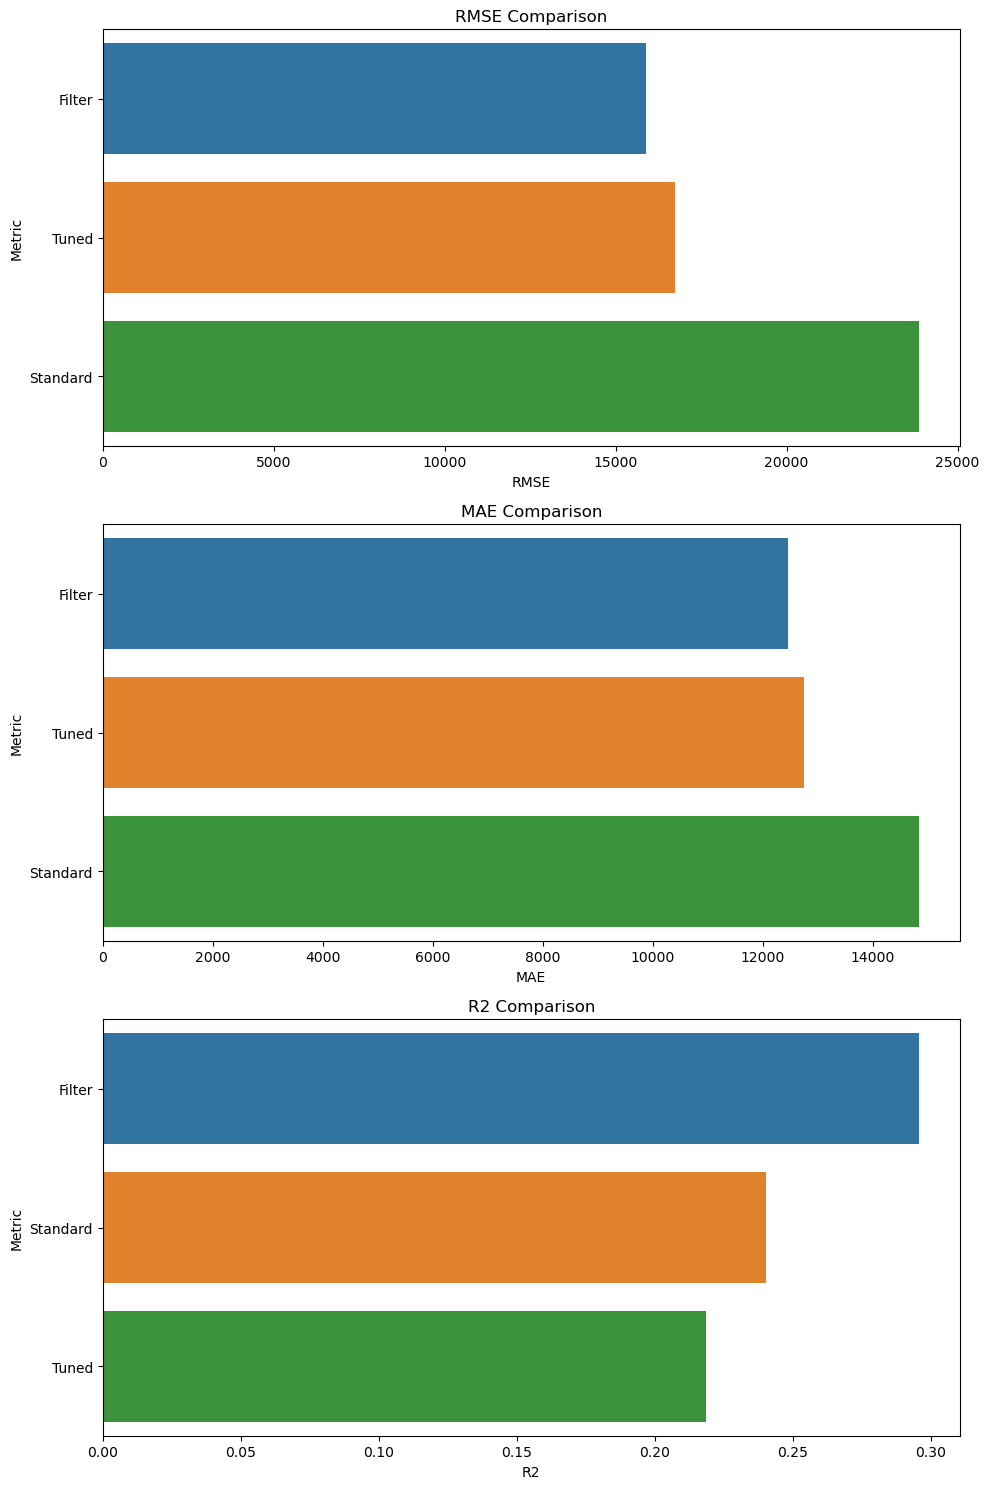

In [20]:
df_rmse = df.sort_values(by='RMSE', ascending=True)
df_mae = df.sort_values(by='MAE', ascending=True)
df_r2 = df.sort_values(by='R2', ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
axes[0].set_title('RMSE Comparison')
sns.barplot(x='RMSE', y='Metric', data=df_rmse, ax=axes[0])
axes[1].set_title('MAE Comparison')
sns.barplot(x='MAE', y='Metric', data=df_mae, ax=axes[1])
axes[2].set_title('R2 Comparison')
sns.barplot(x='R2', y='Metric', data=df_r2, ax=axes[2])

plt.tight_layout()
plt.show()

### All Time Comparison

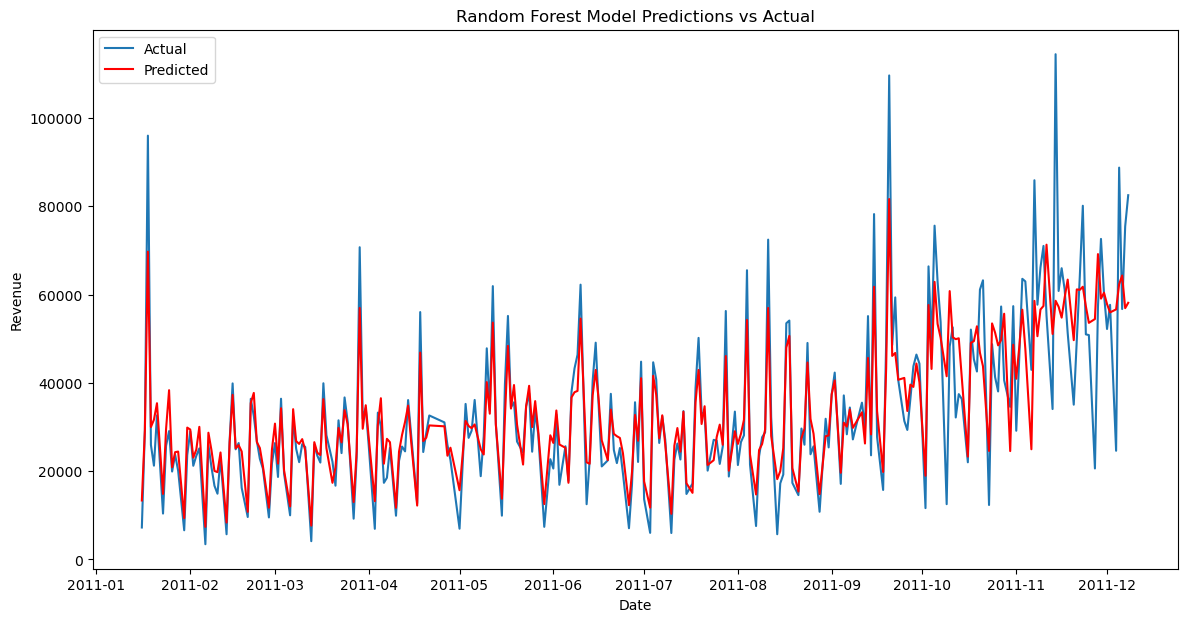

In [21]:
predict_filter_data = rf_model.predict(lagged_filter_data)

plt.figure(figsize=(14, 7))
plt.plot(lagged_filter_data.index, target_filter_data, label='Actual')
plt.plot(lagged_filter_data.index, predict_filter_data, label='Predicted', color='red')
plt.title('Random Forest Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# FORECASTING

In [22]:
daily_revenue_fc = daily_revenue.copy()

days_forecast = 30

for i in range(1, days_forecast+1):
    last_date = pd.to_datetime(daily_revenue_fc.index[-1], format='%Y-%m-%d')
    daily_revenue_fc.loc[(last_date + pd.Timedelta(days=1)).strftime('%Y-%m-%d')] = np.nan

    lagged_data_fc = pd.DataFrame(index=daily_revenue_fc.index)

    for i in range(n_lags, 0, -1):
        lagged_data_fc[f'lag_{i}'] = daily_revenue_fc.shift(i)
    
    lagged_data_fc = lagged_data_fc.dropna()
    predict_data_fc = rf_model.predict(lagged_data_fc)
    last_date = pd.to_datetime(daily_revenue_fc.index[-1], format='%Y-%m-%d')
    daily_revenue_fc.loc[(last_date).strftime('%Y-%m-%d')] = predict_data_fc[-1]

daily_revenue_fc

InvoiceDate
2010-12-01    58960.79000
2010-12-02    47748.38000
2010-12-03    46943.71000
2010-12-05    31774.95000
2010-12-06    54830.46000
                 ...     
2012-01-04    68683.40931
2012-01-05    69318.50341
2012-01-06    65436.81791
2012-01-07    67325.34101
2012-01-08    68071.01492
Name: Revenue, Length: 335, dtype: float64

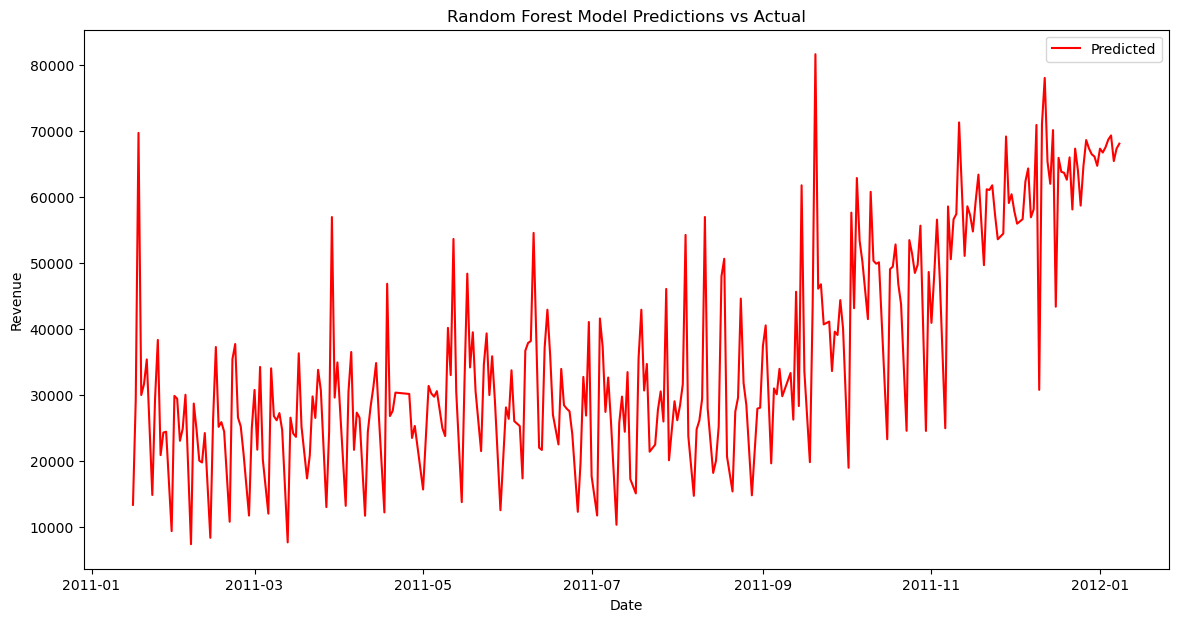

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(lagged_data_fc.index, predict_data_fc, label='Predicted', color='red')
plt.title('Random Forest Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [24]:
predict_data_fc_df = pd.DataFrame(predict_data_fc, columns=['predicted_revenue'], index=lagged_data_fc.index)
predict_data_fc_df.to_csv("forecast.csv")